### Author: Pedro Bueso-Inchausti García

# Genomic Data Analysis and Visualization - Final Project

## Prerrequisites

We unzip the folder where the data is stored.

In [ ]:
# cd ~/
# tar -xvzf data.tar.gz 

We include the metagenomics and phylogenetic information in our data folder.

In [ ]:
# cp -r /home/2019_2020/data/metagenomics ~/data
# cp -r /home/2019_2020/data/phylo ~/data

We create the working directory, where the work will be carried out.

In [ ]:
# mkdir work
# cd ~/work

We copy into the working directory the files that will be needed throughout this project. Just a few notes. We changed the labels on the FASTA files with the reads because there had been an error (see *Importance of functional prediction* for the explanation). We also modified the FASTA file with the reference genome because the last line was longer than it should in this was giving errors when creating the index.

In [ ]:
# cp ~/data/metagenomics/hotspring-normaltemp.1.fq.gz .
# cp ~/data/metagenomics/hotspring-normaltemp.2.fq.gz .
# cp ~/data/metagenomics/hotspring-hightemp.1.fq.gz .
# cp ~/data/metagenomics/hotspring-hightemp.2.fq.gz .
# cp ~/data/reads/hightemp_01.fasta .
# mv hightemp_01.fasta normaltemp_01.fasta
# cp ~/data/reads/hightemp_02.fasta .
# mv hightemp_02.fasta normaltemp_02.fasta
# cp ~/data/reads/normal_01.fasta .
# mv normal_01.fasta hightemp_01.fasta
# cp ~/data/reads/normal_02.fasta .
# mv normal_02.fasta hightemp_02.fasta
# cp ~/data/refs/genome.fna .
# cp ~/data/refs/genes.gff .
#cp ~/data/phylo/novel_proteome.faa .
# cp ~/data/phylo/all_ref_proteomes.faa .
# cp ~/data/phylo/extract_seqs_from_blast_result.py .
# cp ~/data/phylo/additional_seq_info.tsv .

## Presentation of the problem

It seems like we have identified a hot spring in Iceland which, coinciding with regular activities in a nearby volcano,  experiments events of high temperature (close to 90 degrees). After such episodes of high temperatures, there is an algae bloom. We want to know what is exactly happening in here.

## Metagenomics

### General idea

Metagenomics [BI1] refers to the study of genetic material recovered directly from environmental samples. Its purpose is to produce diversity profiles for specific environments; in other words, knowing what type of organisms are they. This approach is becoming more accesible and powerful with time, allowing the investigation in ecology at a much greater scale. It is particularly important in microbiology, as it has revealed that the vast majority of microbial biodiversity have been missed by cultivation-based methods. The first step in our analysis should include a metagenomic comparison of both scenarios, high and normal temperature. This will give us taxonomic profiles that will help in detecting species that appear at different relative abundances under different conditions.

### Execution

Two samples are taken from the hotspring, one during the episodes of high temperature and another one right after it, when the temperature is back to normal and there is an algae bloom. A shotgun metagenomic sequencing is run on these samples. This is an adaptation of the classical shotgun sequencing, which consists on fragmenting a genome, organising the fragments in vectors, introducing them in bacteria, growing such bacteria, creating a genomic library with their sequences and doing the assemble. The adapted approach for metagenomics is essentially the same but fragments are coming from diverse genomes and not only from one. The DNA fragments are sequenced with Illumina pair-end sequencing. This involves sequencing fragments from both ends. As opposed to single-end sequencing, it produces twice the number of reads for the same time and effort, enables accurate alignment and assures a better detection of genomic rearrangments (insertion, deletions, inversions or duplications).

We receive the following FASTAQ files [Appendix, Formats]:

- hotspring-hightemp.1.fq.gz (*foward reads from the high temperature sample*)
- hotspring-hightemp.2.fq.gz (*reverse reads from the low temperature sample*)
- hotspring-normaltemp.1.fq.gz (*forward reads from the normal temperature sample*)
- hotspring-normaltemp.2.fq.gz (*reverse reads from the normal temperature sample*)

By using these files, we can create the taxonomic profiles, which is done with a mOTUs analysis [TR1]. But how does it work?

The first problem that has to be approached is the association of sequences to the same species. The proposed solution is that sequences with the same number of reads are assumed to belong to the same species. Note that we are talking about DNA, so the only thing that determines the number of reads is the abundance of the species with such sequence. Were we talking about RNA, where the expression of each gene plays a role, this might be a bit more difficult.

The second problem that has to be approached is the identification of these already defined species. In classic genomics, we already know that the sequences are belonging to a specific organism. In metagenomics, however, we don't. In order to solve this problem, we need a database of marker genes (MGs) that allows us to associate certain sequences in our metagenomic sample to already studied organisms. There are 40 universal MGs that occur in single copy in the vast majority of known organisms and which have been used to delineate prokaryotic organisms at the species level. The mOTU team have extracted 10 of these 40 universal MGs from ~25,000 prokaryotic reference genomes and ~3,000 metagenomes, have clustered them, and eventually created a database of MG-based operational taxonomic units (mOTUS) with ~2,500 metagenomics mOTUs (meta-mOTUs) and ~5,000 reference mOTUs (ref-mOTUs). Alignments against this database can used to generate taxonomic profiles of shotgun metagenomes (they can also be used for approaching certain metatranscriptome problems but this is, for the moment, not of our interest).  

The third problem that has to be approached is the quantification of the species relative abundance. This is easy to solve from what we have explained. Since the number of reads depend on the relative abundance, species with more reads in their sequences are simply more abundant.

We obtain the mOTUS files [Appendix, FormatS]. This is done with the command *Motus profile -f [forward file] -r [reverse file] -o [motus_file]*.

In [ ]:
# motus profile -f hotspring-normaltemp.1.fq.gz -r hotspring-normaltemp.2.fq.gz -o normaltemp.motus
# motus profile -f hotspring-hightemp.1.fq.gz -r hotspring-hightemp.2.fq.gz -o hightemp.motus

We show the most abundant species for each of the samples by sorting the result based on relative abundance. 

In [ ]:
# echo "Normal temperature"
# grep -v "^#" normaltemp.motus | sort -t$'\t' -k2nr | head -n10
# echo
# echo "High temperature"
# grep -v "^#" hightemp.motus | sort -t$'\t' -k2nr | head -n10

|Most abundant species in normal temperatures|Relative abundance |
|:-:|:-:|
|Pelagibacteraceae species incertae sedis [meta_mOTU_v25_13988]|0.239|
|-1|0.189|
|Pelagibacteraceae species incertae sedis [meta_mOTU_v25_13493]|0.174|
|Porticoccaceae species incertae sedis [meta_mOTU_v25_13235]|0.051|
|Candidatus Aquiluna sp. IMCC13023 [ref_mOTU_v25_06613]|0.048|
|Flavobacteriaceae species incertae sedis [meta_mOTU_v25_13604]|0.039|
|Porticoccaceae species incertae sedis [meta_mOTU_v25_13179]|0.034|
|Candidatus Pelagibacter sp. IMCC9063 [ref_mOTU_v25_06494]|0.034|
|Gammaproteobacteria species incertae sedis [meta_mOTU_v25_13670]|0.030|
|Candidatus Pelagibacter ubique [ref_mOTU_v25_02016]|0.025|

|Most abundant species in high temperatures|Relative abundance |
|:-:|:-:|
|Aquifex aeolicus [ref_mOTU_v25_10705]|0.619|
|Pelagibacteraceae species incertae sedis [meta_mOTU_v25_13988]|0.091|
|-1|0.072|
|Pelagibacteraceae species incertae sedis [meta_mOTU_v25_13493]|0.066|
|Porticoccaceae species incertae sedis [meta_mOTU_v25_13235]|0.019|
|Candidatus Aquiluna sp. IMCC13023 [ref_mOTU_v25_06613]|0.018|
|Flavobacteriaceae species incertae sedis [meta_mOTU_v25_13604]|0.015|
|Porticoccaceae species incertae sedis [meta_mOTU_v25_13179]|0.013|
|Candidatus Pelagibacter sp. IMCC9063 [ref_mOTU_v25_06494]|0.013|
|Porticoccaceae species incertae sedis [meta_mOTU_v25_13179]|0.013|
|Gammaproteobacteria species incertae sedis [meta_mOTU_v25_13670]|0.011|

In both cases, there are unknown species that appear to be relatively important. As for the species that are known, both samples share the same type of organisms, bacteria belonging to the classes Gammaproteobacterias and Alphaproteobacteria, with special relevance of the Pelagibacteraceae family. There is one only exeption; under high temperature conditions, the most abundant species (with a relative abundance of 0.6) is Aquifex aeolicus, which does not appear under normal temperature conditions (its relative abundance is 0).

In [ ]:
# echo "Normal temperature"
# grep "Aquifex aeolicus" normaltemp.motus
# echo
# echo "High temperature"
# grep "Aquifex aeolicus" hightemp.motus

|Species|Normal temperature|High temperature|
|:-:|:-:|:-:|
|Aquifex aeolicus [ref_mOTU_v25_10705]|0.000|0.619|

What can we tell about these species?

Aquifex aeolicus [BI2] is a bacteria that belongs to the Aquificae Phylum, an unusual thermophilic group of bacteria. Aquifex aeolicus grows best in water between 85°C and 95°C, and can be found near underwater volcanoes or hot springs. Regarding its metabolism, it is a chemoautotrophic species with the ability to fixate carbon from CO2 and which uses Krebbs cycle to synthesize metabolites. It is also characterized for its ability to grow optimally under microaerophilic conditions. Due to its high stability against high temperature and lack of oxygen, Aquifex aeolicus is a good candidate for biotechnological applications; for instance, it could replace chemical catalysts as hydrogenases in H2/O2 biofuel cell.

Pelagibacteraceae [BI3] is a family in the Alphaproteobacteria class composed of bacteria that make up roughly one in three cells at the ocean. This type of bacteria have a small size, a small genome and limited metabolic function (some posses gluconeogenesis but not a glycolysis pathway). Regarding their metabolism, they are oligotrophs who feed on dissolved organic carbon and nitrogen (they are uncapable of fixing it) and have an unusual and unexpected requirement for reduced sulfur. Although not being photosynthetic, they are capable of producing ATP from light. Eventually, they are responsible for much of the dissolved methane in the ocean surface.

The appereance of Aquifex aeolicus is quite easy to explain. When temperatures raise at 90º, this organism encounters its perfect habitat so it grows till reaching high levels. The dissapereance of Aquifex aeolicus is also quite easy to explain. When temperatures go back to normal, the organism encounters a habitat which is unfavorable, so it dies but lives the environment with metabolits that can be benefitial to microbial species in the Pelagibacteraceae family. 

But what about the algae bloom that appears? We need to be very careful about this term. We could say that an algae bloom is a rapid accumulation of algae in fresh or marine water. However, if we were to be precise, it should be mentioned that algae blooms are not only named after algae (eukaryotic organisms), but also after prokaryotic photosynthetic organisms like cyanobacteria (which are sometimes refered as blue or green algae, but are not algae). Cyanobacteria would have been noticed in our taxonomic profile, and they are either absent or with a very low relative abundance. Thus, the bloom must be caused by eukaryotic algae (which, by the way, are tipically present in hotspring).

Why are we unable to detect their presence? Well, there are actually a number of reasons. First, it is stated that we just made a shotgun sequencing of the prokaryotic microbiome. Secondly, mOTU uses MGs that appear only in prokaryotes. Eventually, one could think that eukaryotic algae could be identified through their chloroplast DNA; however, mOTU database is only comprised of prokaryotic organisms and therefore eukaryotic organisms cannot be identified. 

Algae blooms [BI4] are usually the result of a nutrient entering the aquatic system. In light of this, it could happen the following. In normal temperature conditions, Pelagibacteraceae bacteria, which are are majority, feed on dissolved nitrogen so its concentration is relatively low. In high temperature conditions, Aquifex aeolicus predominates and so more nitrogen is left to the environment. Although the abundance of nitrogen could trigger the bloom, it is not until temperatures decrease that it appears. The explanation to this could stand on previous research [SP1]. In 1969, the presence of algae in hot springs was studied, being the upper temperature limit for algal growth 68ºC and having optimum growth at a temperature of 59-62ºC. In summary, an scenario with nitrogen abundance and temperatures already a bit decreased seems to be perfect.

## Variant calling and Differential Expression analysis

### General idea

Variant calling [BI5] is the process by which we identify genetic variants from sequence data. Genetic variant are differences that make each individual genome unique; they can be identified by comparing the DNA sequence of an individual to the DNA sequence of a reference genome. There are many different types of variants. Single Nucleotide Polymorphisms (SNPs) are variations that occur when a single nucleotide differs from the reference DNA sequence. Insertions and deletions (indel) are variations that occur when a nucleotide is inserted or deleted from the variant sequence. There are also substitutions (alterations of multiple nucleotides) and structural variations affecting large sections of a chromosome. In the second step of our analysis, we will stick to the detection of SNPs and indels; this will allow us to account for important mutations appearing at different conditions.

Differential expression analysis [BI6] is a field of genomics that tries to discover, through statistical analysis, quantitative changes in the expression levels between experimental groups. The third step in our analysis should include a differential expression analysis of Aquifex aeolicus in normal and high-temperature conditions. This will allow us to detect certain genes that might be involved in its resistance to harsh conditions.

### Execution

#### Data exploration

After finding out that Aquifex aeolicus is very abundant in high-temperature episodes, the lab isolated it and sequenced cDNA (DNA that is complementary to the RNA, giving information about gene expression) of samples from high and normal temperature conditions, two biological replicates each (different samples of the organism for which the same experimental procedure is followed). They eventually performed quality checking.

We receive the following FASTA files [Appendix, Formats]:

- hightemp_01.fasta (*first biological replicate under high temperature conditions*)
- hightemp_02.fasta (*second biological replicate under high temperature conditions*)
- normal_01.fasta (*first biological replicate under normal temperature conditions*)
- normal_02.fasta (*second biological replicate under normal temperature conditions*)

We have a look at the number of reads, length of this reads and metainformation available in the headers. As for the number of reads, we can see that they are quite similar between samples, with differences of less than 2%. As for the length of reads, we appreciate that all of the reads have exactly 100 nucleotides; this is probably due to the filtering, where only the reads with 100 pair bases were kept and the rest discarded. As for the headers, they provide us with the following information: the number of the read, the species (which is unknown) and the mates (fragments that are sequenced in each read).

In [ ]:
# echo "Normal temperature (first biological replicate)"
# echo "Number of reads:" `grep ">" "normaltemp_01.fasta" | wc -l`
# echo "Length of reads:" `cat normaltemp_01.fasta | awk '{if(NR%2==0){print length($0)}}' | uniq` 
# echo "Header:" `head -n1 normaltemp_01.fasta`
# echo
# echo "Normal temperature (second biological replicate)"
# echo "Number of reads:" `grep ">" "normaltemp_02.fasta" | wc -l`
# echo "Length of reads:" `cat normaltemp_02.fasta | awk '{if(NR%2==0){print length($0)}}' | uniq` 
# echo "Header:" `head -n1 normaltemp_02.fasta`
# echo
# echo "High temperature (first biological replicate)"
# echo "Number of reads:" `grep ">" "hightemp_01.fasta" | wc -l`
# echo "Length of reads:" `cat hightemp_01.fasta | awk '{if(NR%2==0){print length($0)}}' | uniq` 
# echo "Header:" `head -n1 hightemp_01.fasta`
# echo
# echo "High temperature (second biological replicate)"
# echo "Number of reads:" `grep ">" "hightemp_02.fasta" | wc -l`
# echo "Length of reads:" `cat hightemp_02.fasta | awk '{if(NR%2==0){print length($0)}}' | uniq` 
# echo "Header:" `head -n1 hightemp_02.fasta`
# echo

|Sample|Number of reads|Length of reads|Header|
|:-:|:-:|:-:|:-:|
|Normal temperature (first biological replicate)|287024|100|>read1/NP_Unk02;mate1:1196-1295;mate2:1324-1423|
|Normal temperature (second biological replicate)|287190|100|>read1/NP_Unk02;mate1:467-566;mate2:618-717|
|High temperature (first biological replicate)|290975|100|>read1/NP_Unk02;mate1:387-486;mate2:539-638|
|High temperature (second biological replicate)|292731|100|>read1/NP_Unk02;mate1:1168-1267;mate2:1295-1394|

The fact that we have only one file per sample appears to indicate that the reads are single-end (were they mate-paired or paired-end, we would expect a forward and a reverse file). The only thing that looks confusing is the information in the headers, which states that each read has a mate1 and a mate2. This, however, could be an error produced by the program so we decide to ignore it. Single-end sequencing involves sequencing fragments from only one end. As opposed to pair-end sequencing, it produces half the number of reads for the same time and effort, leads to less accurate alignment and involves a worse detection of genomic rearrangments (insertion, deletions, inversions or duplications). However, single-end reads are cheaper.

Following the consensus, all the reads are expected to be in the 5’-3’ direction. As for the strand, and due to the way the single-read sequencing is done, the file must contain a mixture of reads sequenced from the forward and the reverse strands. There is no information of the strand on the headers, so it seems like we will have to turn to the reference genome. This can be done in the mapping process.

#### Mapping

Before any downstream analysis (variant calling, differential expression analysis...) it is necessary to map the reads to a reference genome. In order to make this process faster, it is appropriate to build an index of the reference genome prior to doing the mapping. All this process is carried out with bowtie2 [TR2], a fast and memory-efficient tool for aligning sequencing reads to long reference sequences. This tool is suited for short reads, which is convinient as it will prevent from our reads aligning to multiple genomic locations.

We create the genome index. This is done with the command *bowtie2-build [genome_file] [indexed_genome_file]*.

In [ ]:
# bowtie2-build genome.fna genome_index

Now that we have the reads and the indexed genome in the same folder, we are ready to perform the mapping and create the SAM files [Appendix, Formats]. This is done with the command *bowtie2 -x [indexed_genome_file] -f [reads_file] -S [sam file]*, where -f allows for using a FASTA file for the reads instead of a FASTAQ file. We also want to redirect the statistics to an specific file, which we do with *2>>*.

In [ ]:
# touch mapping_stats.txt
# echo "Normal temperature (first biological replicate)" >> mapping_stats.txt
# bowtie2 -x genome_index -f normaltemp_01.fasta -S normaltemp_01.sam 2>> mapping_stats.txt
# echo >> mapping_stats.txt
# echo "Normal temperature (second biological replicate)" >> mapping_stats.txt
# bowtie2 -x genome_index -f normaltemp_02.fasta -S normaltemp_02.sam 2>> mapping_stats.txt
# echo >> mapping_stats.txt
# echo "High temperature (first biological replicate)" >> mapping_stats.txt
# bowtie2 -x genome_index -f hightemp_01.fasta -S hightemp_01.sam 2>> mapping_stats.txt
# echo >> mapping_stats.txt
# echo "High temperature (second biological replicate)" >> mapping_stats.txt
# bowtie2 -x genome_index -f hightemp_02.fasta -S hightemp_02.sam 2>> mapping_stats.txt
# echo >> mapping_stats.txt

We should now examine the SAM files we have created. Which are the things we would like to know? Firstly the number of records and reads. The number of reads, which can be obtained from the 'mapping_stats.txt' document is exactly the same as we accounted for the FASTA files previously. In this document, we can also see the percentage of sequences that were aligned 0 times, exactly 1 time and more than 1 time. 

In [ ]:
# cat mapping_stats.txt

|Sample|Number of reads|Read aligned 0 times|Reads aligned 1 time|Reads aligned >1 times|
|:-:|:-:|:-:|:-:|:-:|
|Normal temperature (first biological replicate)|287024|12 (0.00%)|284609 (99.16%)|2403 (0.84%)|
|Normal temperature (second biological replicate)|287190|13 (0.00%)|284783 (99.16%)|2394 (0.83%)|
|High temperature (first biological replicate)|290975|8 (0.00%)|288650 (99.20%)|2317 (0.80%)|
|High temperature (second biological replicate)|292731|10 (0.00%)|290169 (99.12%)|2552 (0.87%)|

Multiple mapping reads [BI7] are sequences that map more than one time on the genome, for instance, because there are multiple copies of a gene. The problem is that many pipelines ignore them by default so some information might be lost. There are different methodologies to deal with such issue but, as we have less than 1% of multiple mapping reads, we shouldn't worry to much. One possible application of these reads is the identification of Copy Number Variations (CNV) [BI8], which is a structural mutation in which sections of the genome are repeated, being the number of repeats variable between individuals. This could be done if we had DNA information. As we have RNA information (remember that the cDNA is the DNA complementary to the RNA), we would have to track the region of the genome from where the transcripts come in order to discern between single-copy highly expressed genes and multiple-copy genes.

Eventually, we can use the SAM files for determining whether our reads are forward or reverse. This can be seen with the FLAG. For all of the samples, we get the values 0 (unpaired, mapped to the forward strand reads), 4 (unpaired and unmapped reads) an 16 (unpaired, mapped to the reverse strand reads), which means that our reads include sequences that are both forward and reverse.

In [ ]:
# echo "Normal temperature (first biological replicate)"
# grep -v "@" normaltemp_01.sam | cut -f2 | sort -g | uniq
# echo
# echo "Normal temperature (second biological replicate)"
# grep -v "@" normaltemp_02.sam | cut -f2 | sort -g | uniq
# echo
# echo "High temperature (first biological replicate)"
# grep -v "@" hightemp_01.sam | cut -f2 | sort -g | uniq
# echo
# echo "High temperature (second biological replicate)"
# grep -v "@" hightemp_02.sam | cut -f2 | sort -g | uniq

|Sample|FLAGS|
|:-:|:-:|
|Normal temperature (first biological replicate)|0,4,16|
|Normal temperature (second biological replicate)|0,4,16|
|High temperature (first biological replicate)|0,4,16|
|HIgh temperature (second biological replicate)|0,4,16|

#### Variant calling preparation

The variant calling analysis does not use SAM file but BAM files. This Binary Alignment Map (BAM) format stores the same data in a compressed binary representation that allows for faster computation. Therefore, it is necessary to prepare such BAM files, which tipically requires from the transformation itself, the sorting and the merging. This process is carried out with Samtools [TR3], a set of programs for interacting with high-throughput sequencing data. Specifically, we will be using the Samtool repository, that allows reading/writing/editing/indexing/viewing SAM/BAM/CRAM files.

The first step consists on transforming the SAM files into BAM files. This is done with the command *samtools view -bS [sam_file] > [bam_file]*.

In [22]:
# samtools view -bS normaltemp_01.sam > normaltemp_01.bam
# samtools view -bS normaltemp_02.sam > normaltemp_02.bam
# samtools view -bS hightemp_01.sam > hightemp_01.bam
# samtools view -bS hightemp_02.sam > hightemp_02.bam

The second step consists on sorting the BAM files to make the computation fast. This is done with the command *samtools sort [bam_file] > [sorted_bam_file]*. 

In [23]:
# samtools sort normaltemp_01.bam > normaltemp_01_sorted.bam
# samtools sort normaltemp_02.bam > normaltemp_02_sorted.bam
# samtools sort hightemp_01.bam > hightemp_01_sorted.bam
# samtools sort hightemp_02.bam > hightemp_02_sorted.bam

The third step is to merge the files belonging to different biological replicates. Such thing will allow us to compare high temperature and normal conditions with a higher number of reads (which is useful for giving greater confidence to the analysis). This is done with the command *samtools merge -h [sam_file_1] -h [sam_file_2] [merged_bam_file] [sorted_bam_file_2] [sorted_bam_file_2]*. From the SAM files we only take the headers.

In [24]:
# samtools merge -h normaltemp_01.sam -h normaltemp_02.sam normaltemp.bam normaltemp_01_sorted.bam normaltemp_02_sorted.bam
# samtools merge -h hightemp_01.sam -h hightemp_02.sam hightemp.bam hightemp_01_sorted.bam hightemp_02_sorted.bam

It is eventually necessary to index the genome using the command *samtools faidx [genome_file]*. Otherwise the variant calling won't work.

In [25]:
# samtools faidx genome.fna

#### Variant calling analysis

Having all the files ready, we can carry out the variant calling analysis. This process is carried out with Samtools. Specifically, we will be using BCFtools repository, that allows reading/writting BCF2/VCF/gVCF files and calling/filtering/summarising SNP/indels.

We identify the variants and create the VCF file [Appendix, Formats] with the command *bcftools mpileup -f [indexed_genome_file] [bam_file] > [vcf_file]*.

In [ ]:
# bcftools mpileup -f genome.fna normaltemp.bam > normaltemp.vcf
# bcftools mpileup -f genome.fna hightemp.bam > hightemp.vcf

We select the variant with the command *bcftools call -vc [vcf_file] > [snp_bcf_file]*. 

In [ ]:
# bcftools call -vc normaltemp.vcf > normaltemp_variants.vcf 
# bcftools call -vc hightemp.vcf > hightemp_variants.vcf

We should now examine the VCF files we have created. We first calculate the number of variants and, from them, the number of SNPs and variants. This can be done by focusing on the fifth column (when it contains only one nucleotide, it refers to a SNP; when it contains several nucleotides separated by commas, it refers to an insertion; when it contains a dot, it refers to a deletion). We then calculate the number of variants with a quality and depth greater or equal than 10. We eventually get the variant with the highest quality. 

In [ ]:
# echo "Normal temperature"
# echo "Number of variants:" `grep -v "#" normaltemp_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" normaltemp_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" normaltemp_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" normaltemp_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" normaltemp_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" normaltemp_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`
# echo
# echo "High temperature"
# echo "Number of variants:" `grep -v "#" hightemp_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" hightemp_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" hightemp_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" hightemp_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" hightemp_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" hightemp_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`

|Sample|Variants|SNPs|Indels|Variants with 10+ quality|Variants with 10+ depth|Variant with best quality
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Normal temperature|116|116|0|18|23|135610 G T
|High temperature|126|126|0|17|25|135610 G T

There are some interesting things about these results. One thing to remark is that all the variants are SNPs. I would have expected significant differences in the number of variants (out of his natural habitat, one could think that Aquifex aeolicus has an increased number of variants); however, samples under high and low temperatures have similar number of SNPs. The best quality variant is shared in both conditions, it is located in position 135610 from the reference genome. If we check in the GFF file [Appendix, Formats], we can see that these position corresponds to a NifA family transcriptional regulator. In such protein, the SNPs produces a substitution from Glutamine to Lysine (see Functional Prediction for the explanation of its possible consequences).

To verify the existence of the SNP, I will use the Integrative Genomics Viewer (IGV) [TRX], a high-performance viewer that allows the visualization of large, heterogeneous data sets. For its proper functioning, IGV requires the genome in FASTA format, the genome index, the BAM files under normal and high-temperature conditions, and the BAM files index (which we already need to create with the command *samtools index [bam_file]*).

In [ ]:
# samtools index normaltemp.bam
# samtools index hightemp.bam

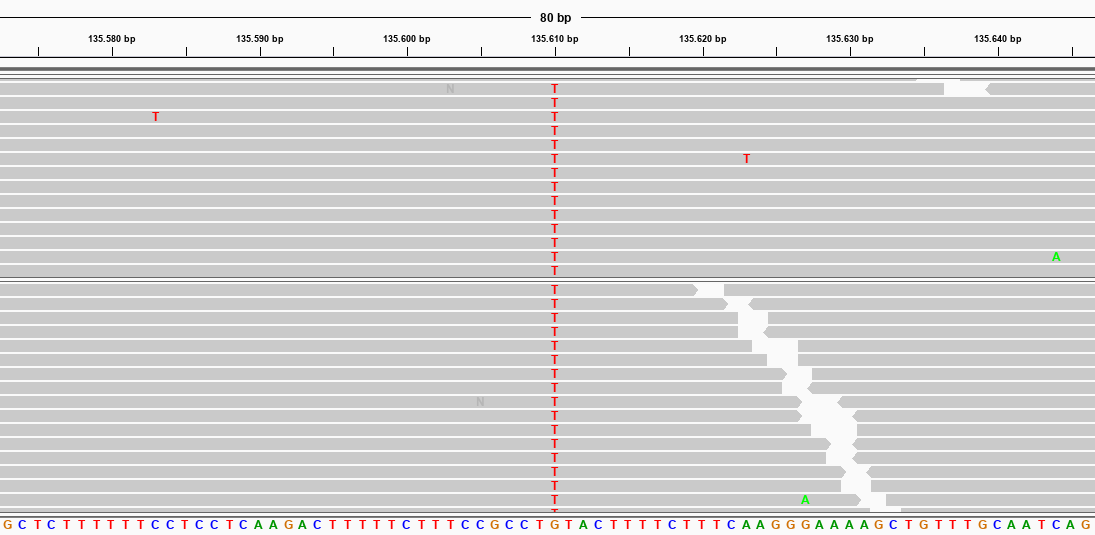

If we repeat all this process with the individual BAM files (without merging them), we have the following results.

In [ ]:
# bcftools mpileup -f genome.fna normaltemp_01_sorted.bam > normaltemp_01.vcf
# bcftools mpileup -f genome.fna normaltemp_02_sorted.bam > normaltemp_02.vcf
# bcftools mpileup -f genome.fna hightemp_01_sorted.bam > hightemp_01.vcf
# bcftools mpileup -f genome.fna hightemp_02_sorted.bam > hightemp_02.vcf

# bcftools call -vc normaltemp_01.vcf > normaltemp_01_variants.vcf 
# bcftools call -vc normaltemp_02.vcf > normaltemp_02_variants.vcf 
# bcftools call -vc hightemp_01.vcf > hightemp_01_variants.vcf 
# bcftools call -vc hightemp_02.vcf > hightemp_02_variants.vcf

In [ ]:
# echo "Normal temperature (first biological replicate)"
# echo "Number of variants:" `grep -v "#" normaltemp_01_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" normaltemp_01_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" normaltemp_01_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" normaltemp_01_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" normaltemp_01_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" normaltemp_01_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`
# echo
# echo "Normal temperature (second biological replicate)"
# echo "Number of variants:" `grep -v "#" normaltemp_02_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" normaltemp_02_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" normaltemp_02_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" normaltemp_02_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" normaltemp_02_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" normaltemp_02_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`
# echo
# echo "High temperature (first biological replicate)"
# echo "Number of variants:" `grep -v "#" hightemp_01_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" hightemp_01_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" hightemp_01_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" hightemp_01_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" hightemp_01_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" hightemp_01_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`
# echo
# echo "High temperature (second biological replicate)"
# echo "Number of variants:" `grep -v "#" hightemp_02_variants.vcf | wc -l`
# echo "Number of SNPs" `grep -v "#" hightemp_02_variants.vcf | awk '{if($5!~/\.|,/)print $5}' | wc -l`
# echo "Number of indels:" `grep -v "#" hightemp_02_variants.vcf | awk '{if($5~/\.|,/)print $5}' | wc -l`
# echo "Number of variants with 10+ quality:" `grep -v "#" hightemp_02_variants.vcf | awk '{if($6>=10)print $6}' | wc -l`
# echo "Number of variants with 10+ depth:" `grep -v "#" hightemp_02_variants.vcf | cut -f8 | tr ';' '\t' | cut -f1 | sed -e 's/DP=//g' | awk '{if($1>=10)print $1}' | wc -l`
# echo "Variant with the best quality:" `grep -v "#" hightemp_02_variants.vcf | sort -k6gr | cut -f2,4,5 | head -n1`

|Sample|Variants|SNPs|Indels|Variants with 10+ quality|Variants with 10+ depth|Variant with best quality
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Normal temperature (first biological replicate)|342|342|0|64|76|135610 G T
|Normal temperature (second biological replicate)|389|389|0|60|70|135610 G T
|High temperature (first biological replicate)|398|398|0|74|88|135610 G T
|High temperature (second biological replicate)|353|353|0|47|56|135610 G T

The number of variants that we obtain is higher. This makes sense because in the merge file we were only retrieving the SNPs that were shared by both samples, so we were being more restrictive. This is why we should probably trust more in the variant information comming from several organisms, as variants are mutations that are shared across populations or conditions.

#### Differential expression analysis

We calculate the counts for each gene in each sample with the command *htseq-count -i Name -t gene -f [sorted_bam_file] [genes_gff_file] > [count_file]*.

In [ ]:
# htseq-count -i Name -t gene -f bam normaltemp_01_sorted.bam genes.gff > normaltemp_01_count.txt
# htseq-count -i Name -t gene -f bam normaltemp_02_sorted.bam genes.gff > normaltemp_02_count.txt
# htseq-count -i Name -t gene -f bam hightemp_01_sorted.bam genes.gff > hightemp_01_count.txt
# htseq-count -i Name -t gene -f bam hightemp_02_sorted.bam genes.gff > hightemp_02_count.txt

We merge these files based on genes with the command join.

In [ ]:
#join normaltemp_01_count.txt normaltemp_02_count.txt | join - hightemp_01_count.txt | join - hightemp_02_count.txt > counts.txt

We perform the differential expression analysis with the Bioconductor package DESeq2. Bioconductor [TR4] is an open source project that uses R statistical programming language to analyse and comprehend high-throughput genomic data. DESeq2 [TR5] is a package that allows doing differential gene expression analysis based on the negative binomial distribution.

The script [Appendix, Scripts] determines which genes are significantly different based on hypothesis testing. For each of this genes, it returns 3 parameters: the p-value, the adjusted p-value and the fold change. Let's see what they mean.

Essentially, hypothesis testing [SP2] is a statistical method which determines whether the sampled data is for or against the null hypothesis (tipically, that data being compared are similar). The hypothesis tests are usually culminated with a single value, the p-value. This quantifies the probability of the result ocurring by pure chance given the null hypothesis. If such probability is very low (the conventional threshold is 5% or p-value of 0.05), then we can reject the null hypothesis and state that the two samples being compared are significantly different. 

One important issue affecting the p-value is multiple testing. In our case, we are comparing the expression of ~1500 genes. If we assume independence between the comparison tests and a level of significance of 0.05 in each, we would expect 5% of the comparisons to be significant just by pure chance. In other words, 75 of our genes could be given denoted as differentialy expressed when they really are not. The problem is that the probability of a false positive is considered for each test and not for all of them. The adjusted p-value comes to solve this problem and it is, at least in our case, the most appropriate metric to have a look at. The fold change [BI9] is a much more intuitive metric, it just describes the change two quantities as their ratio (it can suffer, however, from latter transformations; being the logarithmic a quite common one).

The histogram for the p-value shows how genes distribute quite uniformly across the range between 0 and 1. The histogram for the adjusted p-value shows a strange binary behaviour; most genes are pushed to values close to 1 and a few of them, the significant ones, or pushed to value close to 0. After some research, it turns that this behaviour is not strange at all. 
It is quite common for adjusting methods to reduce the number of significant p-values but also increase large p-values. DESeq2 uses a Benjamini & Hochberg correction, which is known to lead, in some cases, to this discretized behaviours.

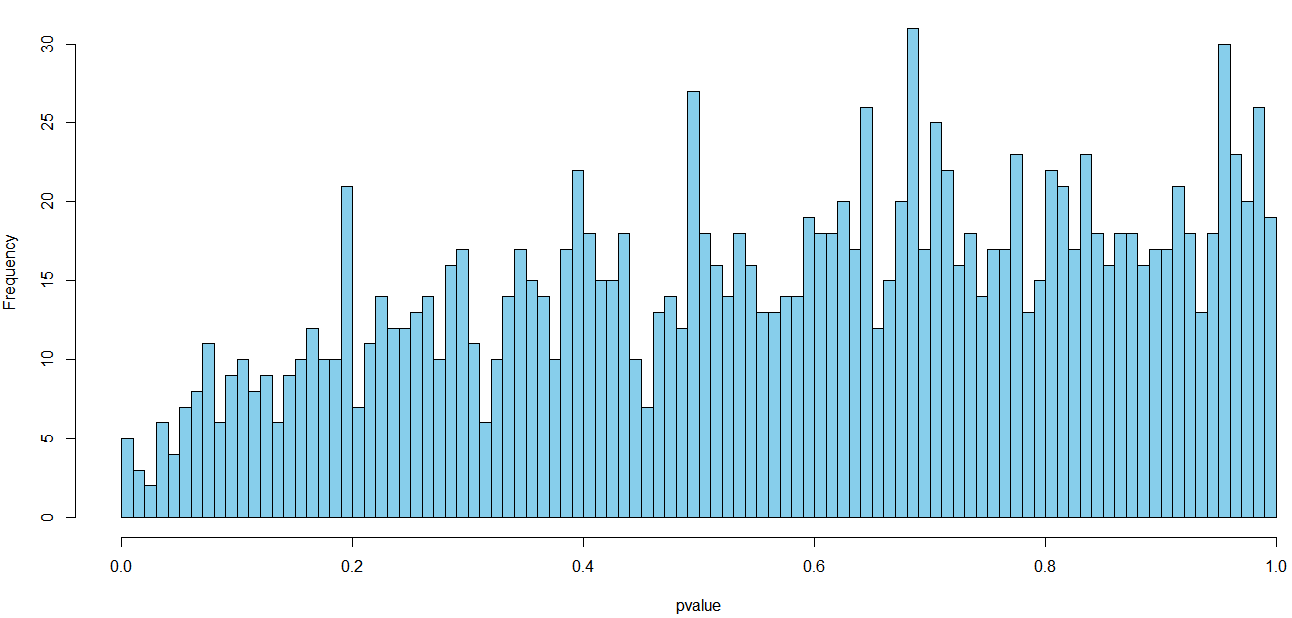

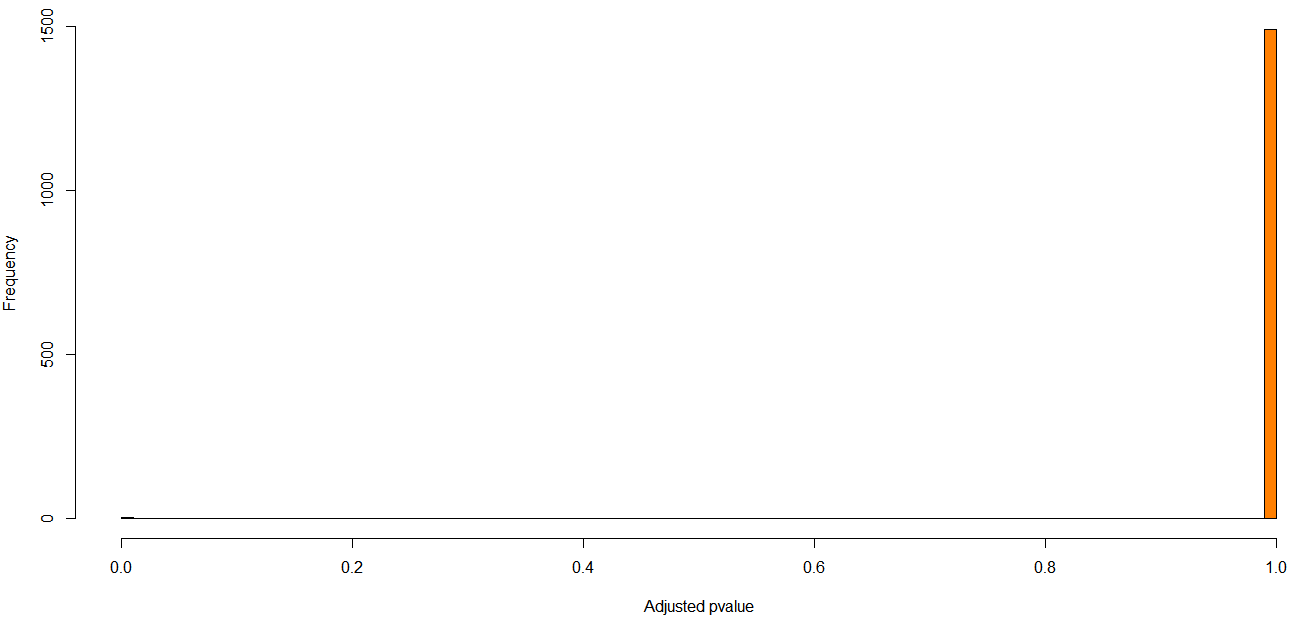

We consider that genes are significant when the adjusted p-value is below 0.01. This happens for 4 genes: NP_213090.1 and NP_213693.1 have higher expression levels under normal temperature conditions, NP_Unk01 and NP_Unk02 have higher expression levels under high temperature conditions.

|gene|log2FoldChange|pvalue|padj|
|:-:|:-:|:-:|:-:|
|NP_213090.1|3.561|1.384e-45|6.907e-43|
|NP_213693.1|3.525|5.441e-43|2.036e-40|
|NP_Unk01|-2.155|7.618e-95|5.702e-92|
|NP_Unk02|-2.387|1.119e-106|1.674e-103|

|Gene|Normaltemp1|Normaltemp2|Hightemp1|Hightemp2|
|:-:|:-:|:-:|:-:|:-:|
|NP_213090.1|409|403|29|40|
|NP_213693.1|390|368|34|32|
|NP_Unk01|371|337|1621|1540|
|NP_Unk02|320|274|1521|1595|

Given that these genes were selected based on their adjusted p-value and that we have been very restrictive in the level of significance, we can be pretty confident that these four genes are differentially expressed.

## Functional prediction and Phylogenetic analysis

### General idea

Protein functional prediction [BI10] consists of a set of techniques that bioinformatics researchers use to assign biological roles to proteins. These predictions are often driven by data-intensive computational procedures and the information may come from sequence homology, protein structure, protein-protein interaction, gene expression profiles, phylogenetic profiles, publications text-mining...

Phylogenetics [BI11] is the study of the evolutionary history and relationships among groups of organisms. Such relationships are discovered through phylogenetic inference methods that evaluate observed heritable traits, tipically genetic information. The results of these analysis are phylogenetic trees, diagramatic hypothesis about the evolutionary history of a group of organisms.

The fourth and fifth step in our analysis should include the functional prediction and the phylogeny of differentialy expressed proteins. This might allow us to clarify their role in the whole process.

### Execution

#### Genome projects

The best way to search for genome projects is to enter in Genomes Online Database (GOLD) [TR6], a resource for comprehensive access to information regarding genome and metagenome sequencing projects. When we search for ‘Aquifex aeolicus’, only one project appears. Its name is Aquifex aeolicus VF5, which means that only the strain VF5 has been sequenced.

#### Functional prediction

We will now enter in the functional prediction of the proteins we have found to be differentially expressed. What we know to the moment are the ‘Names’ that the GFF file gives for each of our sequences. If we have a look at these files, we can easily retrieve the GenBank ID, with which we will be doing our investigation. The first database one must check when searching for protein information is Uniprot [TR7], a comprehensive resource for protein sequences and annotation data.  From Uniprot, one can access to many other resources. As for the functionality and cellular location, we are redirected to Gene Ontology (GO) [TR8], that provides a computational representation of the genes function. As for the domains, we are redirected to Pfam [TR9], that represent protein families with multiple sequence alignments and Hidden Markov Models, and Interpro [TR10], that provides functional analysis by classifying proteins into families and predicting their domains. As for the interaction, we are redirected to STRING [TR11], that uses computational prediction and previous knowledge to give physical and functional associations between proteins. Eventually, we can search for homologs in BLAST [TR12], a program that find homologous regions by comparing sequences to sequence databases and calculating the statistical significance.

One important thing that we must take into consideration is that not all the differentially expressed proteins are of our interest. On the one hand, the proteins that overexpress in normal temperature are worthless for our problem (the relative abundance of Aquifex aeolicus under these conditions is insignificant, so whatever these proteins do, it will have no impact in the ecosystem). On the other hand, the proteins that overexpress in high temperature are highly relevant for our problem (the relative abundance of Aquifex aeolicus under these conditions is considerable, so whatever these proteins do, it will have an impact in the ecosystem). Following the indicated workflow, this is the information we retrieve.

NP_UnK01 has no GenBank ID. As we can have access to its sequence, it looks reasonable to look for homologs that may give us some information. If we blast this protein, most of the species that appear are methanogenic bacteria, being Methanomassiliicoccus luminyensis the first of them. The best results correspond to AAA family ATPases and nitrogenase iron proteins NifH. The first are proteins that play different roles in processes like cell-cycle regulation, intracellular transport, organelle biogenesis, protein proteolysis and disaggregation… The second, also known as dinitrogenase reductase or Fe protein, is a component of the nitrogenase (enzyme responsible of nitrogen fixation) which supplies the energy and electrons necessary for the reduction of molecular nitrogen to ammonia.

NP_UnK02 GenBank ID is NP_213151.1, which corresponds to the protein NifA, transcribed from the gene nifA. NifA is a protein in charge of transcription regulation; specifically, it is required for activation of Nif operons, which are directly involved in nitrogen fixation. This protein contains 3 major domains: GAF domain (it appears in a wide range of proteins, with special relevance in cyclases, phospodiesterases, FhlA and NifA), HTH_8 motif (it appears in bacterial and archaeal proteins, where it is involved in gene expression regulation) and sigma-54 interaction domain (it appears in bacterial and archaeal proteins, where it is involved in ATP-dependent interaction with sigma-54, a transcription factor that controls the transcription of genes related to nitrogen fixation and synthesis of flagellum/pili). If we blast the protein, the best results are sigma-54-dependent regulators and the first species that appear is Hydrogenivirga caldilitoris.

Regarding the interactions between these two proteins, the scientific literature accounts for direct relationship through their domains. For instance, several papers talk about how sigma-54 controls the expression of NifH related genes, directing the RNA polymerase sigma-54 to the promoter [SP3,SP4,SP5].

So, after all this research, what could be inferred. It appears like, when the temperatures go high, the levels of bioavailable nitrogen decrease so the ability to fix it becomes decisive. There is one mechanism (which we still need to uncover) that induces the overexpression of NifA, which leads to the overexpression NifH, and results in an increase of nitrogen fixation. When temperatures go back to normal and Aquifex aeolicus dies, it could happen that all this nitrogen stored is released to the environment. This combination of moderate temperatures and high nitrogen abundance could then trigger the algal bloom.

It looks reasonable, at this point, to recall the SNP that was found in the variant calling analysis. Such SNP produced a substitution from Glutamine to Lysine in the NifA protein, the same one that is overexpressed in high temperatures. The fact that this mutation is highly conservered means that it is being benefitial to the organism. In relation to this, I propose two ideas. The first idea is based on studies [SP6] which report that the N-terminal domain of NifA plays a decisive role in the temperature sensitivity of the protein. This mutation appears in the N-terminal domain and it could be related with the protein viability at high temperatures. The second idea is based on studies [SP7] that talk about benefitial NifA mutants. Apparently, under innappropriate conditions for nitrogen fixation, NifL inhibits NifA through the formation of the NifL-NifA protein complex. However, certain NifA mutants appear to be resistant to the inhibitory action of NifL in response to nitrogen status. If that was happening in our system, we might have discovered the mechanism that induces NifA overexpression.

Although we already explained why the proteins that overexpress at normal temperatures were none of our interest, we were curious about what information they might give us. We analyzed these two proteins, NP_213090.1 and  NP_213693.1, as we did with the previous ones. The first (NusB) is related to transcription regulation; the second (RelE/ParE family) is associated to toxin-antitoxin systems. If we search in depth, we see that they both share a bound with the environmental stress process. Under normal temperatures conditions, Aquifex aeolicus is out of its natural habitat, so it makes total sense that the pathways related to stress are activated.

##### Importance of functional prediction

The FASTA files that we had received at the beggining were wrongly labelled: the reads belonging to normal temperatures were  labelled as high temperatures and vice versa. While doing the analysis, it is quite difficult to become aware of these mistakes. With respect to this, the functional prediction is a key process as it allows to recall whether our results look coherent. In our case, it seemed like the ability to fix nitrogen appeared under normal temperature conditions while the stress appeared under high temperature conditions. This made little sense and so we told it to the investigators that had prepared the data. They realised that the files were indeed incorrectly labelled and so we changed them at the beggining. This incindent reminds us about the importance of doing genomic analysis conscientiously, thinking about whether the results we obtain are coherent with what we are expecting.

#### Phylogenetic analysis

We retrieve the proteins sequences from the FASTA file containing the proteome of Aquifex aeolicus.

In [ ]:
# grep -A 1 "NP_213090.1" novel_proteome.faa > NP_213090.1.fas
# grep -A 1 "NP_213693.1" novel_proteome.faa > NP_213693.1.fas
# grep -A 1 "NP_Unk01" novel_proteome.faa > NP_Unk01.fas
# grep -A 1 "NP_Unk02" novel_proteome.faa > NP_Unk02.fas

We generate a BLAST database from FASTA file containing the proteomes. This is done with the command *makeblastdb -dbtype prot -in [multifasta_file]*.

In [ ]:
# makeblastdb -dbtype prot -in all_ref_proteomes.faa

We run the analysis for the proteins that are overexpressed at high temperatures and generate the tabular BLAST files [Appendix, Formats]. This is done with the command *blastp -task blastp -query [protein_fasta_file] -db [multifasta_file] -outfmt [format] -evalue [evalue]*. 

In [21]:
# blastp -task blastp -query NP_Unk01.fas -db all_ref_proteomes.faa -outfmt 6 -evalue 1e-5 > NP_Unk01_blast.txt 
# blastp -task blastp -query NP_Unk02.fas -db all_ref_proteomes.faa -outfmt 6 -evalue 1e-5 > NP_Unk02_blast.txt

The e-value or expect value [BI12] is a parameter that describes the number of hits one can expect to see by chance when searching a database of a particular size. For instance, an e-value of 1 can be interpreted in the following way: "in a database of the current size, it is expected to see 1 match with a similar score simply by chance". The lower the e-value, the more significant the match is; it can, therefore, be used as a threshold for reporting results (which is what we do here with a value of 1e-5). One thing to take into account is that the calculation of the e-value does not only considers the score of the alignment but also the length of the query sequences; this explains why virtually identical short alignments have high e-vales (shorter sequences have higher probability of ocurring in the database purely by chance).

We create a FASTA file with all the sequences of selected hits. To do so, we use the *extract_seqs_from_blast_result.py* script, which extract the sequences that appear in our BLAST result and put them all together in a FASTA file.

In [ ]:
# python extract_seqs_from_blast_result.py NP_Unk01_blast.txt all_ref_proteomes.faa > NP_Unk01_blast.faa
# python extract_seqs_from_blast_result.py NP_Unk02_blast.txt all_ref_proteomes.faa > NP_Unk02_blast.faa

We use clustal omega [TR13] to perform a multiple sequence alignment. This is done with the command *clustalo -i [fasta_file] > [alignment_file]*.

In [ ]:
# clustalo -i NP_Unk01_blast.faa > NP_Unk01_blast.alg
# clustalo -i NP_Unk02_blast.faa > NP_Unk02_blast.alg

We use iqtree [TR14] to infer a phylogenetic tree by maximum likelihood. This is done with the command *iqtree -s [alignment_file] -fast*. Note that we use the fast method, which reduces computation time without loosing much accuracy.

In [ ]:
# iqtree -s NP_Unk01_blast.alg -fast
# iqtree -s NP_Unk02_blast.alg -fast

One of the main goals of phylogenetic analysis is to infer orthologs. But what are these exactly? Both orthologs and paralogs are homologs, which means they come from common ancestors. Orthologs are homologs in different species that originated through an speciation event (the fact that orthologs exist only between different species is what forces the trees to be built with proteins from different organisms). Paralogs are homologs that originated through a duplication event and evolve differently.

Orthology inference [SP8] is important because orthologs, as compared to paralogs, are more likely to share the same function. Most orthology inference methods can be classified into two major types: graph-based methods and tree-based methods. Those of the second type are based on tree reconciliation, which is the process of annotating all splits of a given tree as duplication or speciation. Once this has been done, it is trivial to establish whether a pair of genes is orthologous or paralogous, based on the type of the branching where they coalesce: all pairs of genes which coalesce in a speciation node are orthologs; all pair of genes which coalesce in a duplication node are paralogs.

So we need to visualize the trees in order to infer orthology. To do so, we will be using Pyton package ETE Toolkit [TR15], which offers a collection of command line tools to run operations in phylogenetics and comparative genomics. The script [Appendix, Scripts] produces the following trees. For visualization purposes, we have decided to include only the gene name, the species name and the linage. Only in those cases where the gene name is 'N/A', we include the functional description of the gene. Our proteins are coloured in red and the group to which they corresponds appears in blue (we have selected a internal node that includes a fair number of external nodes).

Regarding our first protein, NP_Unk01, it looks like the closest ortholog is '4Fe-4S iron sulfur cluster binding proteins (Methanosarcina acetivorans)'. If we look at the whole group of proteins that surround NP_Unk01, we can see that they are all oxidorreductases linked to the nitrogenase, which support our previous functional annotation. As for the evolutionary history, the most recent event was an speciation that generated the already mentioned orthologs. However, it is interesting to see how Methanosarcina acetivorans has suffered lots of duplication events, which explains why many of its proteins appear in the same group.

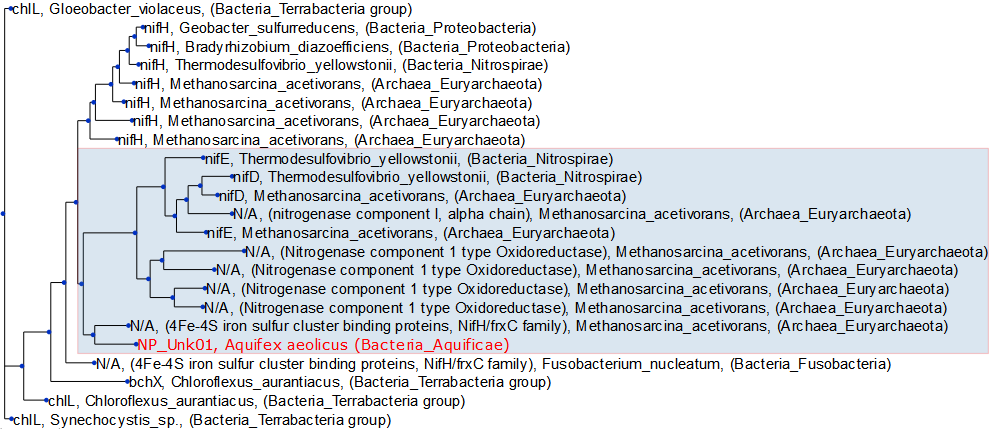

Regarding our first protein, NP_Unk02, it looks like the closest ortholog is 'nifA (Leptospira interrogans)'. If we look at the whole group of proteins that surround NP_Unk02, we can see that they are all transcriptional regulators linked to sigma-54, which support our previous functional annotation. As for the evolutionary history, it is clear that the most recent event was a duplication in Aquifex aeolicus that lead to the divergence between the protein norR and NifA. The speciation event that generated the already mentioned orthologs was previous.

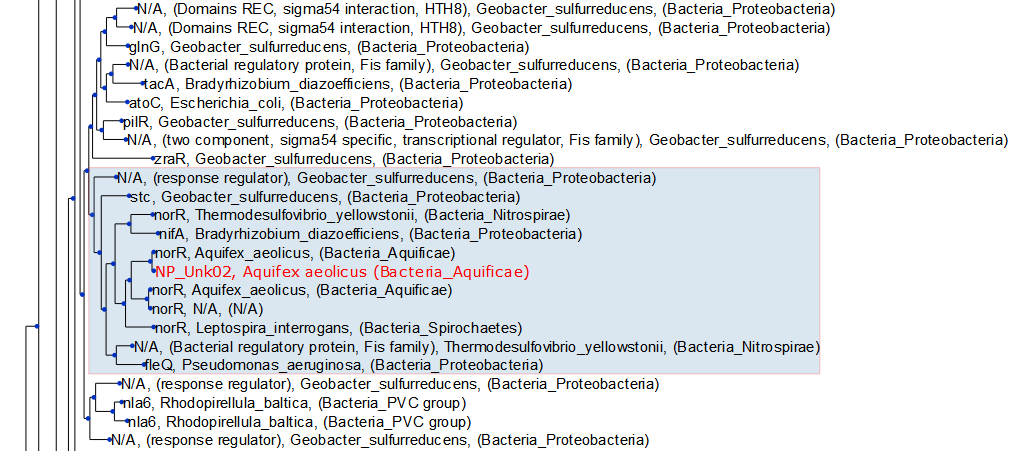

## Final hypothesis

Our final explanation to the situation is the following:

"When the temperature in the hot-spring raises to 90ºC, most of the organisms are removed and Aquifex aeolicus, a thermophilic bacteria, colonizes the habitat with a relative abundance of more than 60%. With the temperature increase, the levels of bioavailable nitrogen decrease so the ability to fix it becomes decisive. There is one mechanism (probably a conserved variant in the protein) that induces the overexpression of NifA (transcriptional regulator) in response to nitrogen status. This situation leads to the overexpression of NifH (oxidoreductase that forms part of the nitrogenase) and so nitrogen fixing rate increases. When the temperatures in the hot-spring go back to normal, Aquifex aeolicus encounters a habitat which is unfavorable, so it dies and all the nitrogen stored is released to the environment. This combination of moderate temperatures and high nitrogen abundance allows for other microbial species, in particular those of the Pelagibacteraceae family, to colonise the habitat. Not only this, but triggers the algal bloom."

## Appendix

### Formats

#### MOTUS

The mOTUS format [BI13] is a text-based format for describing mOTUS analysis. It includes the following parts:

- Header 1: version of the scripts, version of the database and parameters used for the computation.
- Header 2: call that produced the profile.
- Header 3: information of what the rows represent.
- Rest of rows: ref-mOTUs or meta-mOTUs with their relative abundances

Note that ref-mOTUs represent species with a reference genome in NCBI, while meta-mOTUs represent represents species without a reference genome which are extracted from metagenomes. The first appear at the species level while the second is not. It can happen that, instead of a ref-mOTUs or meta-mOTUS, we encounter with a -1. This represents the fraction of unmapped reads, this is, species that we know to be present in the sample, but we are not able to identify. The usefulness of this -1 comes out when we need to calculate relative abundances.

#### FASTA

FASTA is a text-based format for storing biological sequences. For each read, we find:

- Row 1: header that describes the sequence. It begins with the > symbol.
- Row 2: sequence itself. 

#### FASTAQ

FASTAQ is a text-based format that stores biological sequences with its corresponding quality score. For each read, we find:

- Row 1: begins with the @ symbol and contains the sequence identifier.
- Row 2: contains the sequence itself.
- Row 3: begins with the + symbol and is optionally followed by the sequence identifier.
- Row 4: contains the quality values, with one symbol for each nucleotide. 

#### SAM

Sequence Alignment Map (SAM) [BI14] is a text-based format for storing biological sequences aligned to a reference sequence. It consists of a header and an alignment section. Headings begin with the @ symbol. The alignment section contains 11 mandatory fields:

- Column 1 (QNAME): query sequence.
- Column 2 (FLAGs): integer whose sum denotes multiple attributes of a read alignment
- Column 3 (RNAME): reference sequence.
- Column 4 (POS): mapping position. It refers to the first mapping base in the reference sequence.
- Column 5 (MAPQ): mapping quality. It is calculated based on the probability that a base is wrong.
- Column 6 (CIGAR): string that indicate which bases align with the reference sequence and which are insertions or deletions.
- Column 7 (RNEXT): reference sequence of the primary alignment of the next read.
- Column 8 (PNEXT): mapping position of the primary alignment of the next read.
- Column 9 (TLEN): query sequence lenght.
- Column 10 (SEQ): mapped sequence.
- Column 11 (QUAL): quality of the mapped sequence.

#### VCF

Variant Call Format (VCF) [BI15] is a text-based format for storing biological sequences variations. It consists of a header and a variant calling section. Headings, which begins with the # symbol provides metadata describing the body of the file. The variant calling section contains 8 mandatory fields:

- Column 1 (CHROM): reference sequence on which the variation is being called.
- Column 2 (POS): variation position in the variant sequence.
- Column 3 (ID): identifier of the variation.
- Column 4 (REF): nucleotide in the reference sequence at the given position.
- Column 5 (ALT): alternative nucleotides in the variant sequences at the given position. 
- Column 6 (QUAL): quality score associate with the inference of the given alleles.
- Column 7 (FILTER): flagg indicating which filters the variation passed.
- Column 8 (INFO): list of fields describing the variation.

Existing formats such as General feature format (GFF) store all the genetic data, much of which is redundant because it will be shared across the genomes. By using the VCF, only the variations are stored along with a reference genome.

#### GFF

The General Feature Format (GFF) [BI16] is a text based format for describing genes and features of DNA, RNA and proteins. It is tab-delimited with 9 fields:

- Column 1 (Sequence): name of the sequence where the feature is located.
- Column 2 (Source): keyword identifying the source of the feature, like a program or an organization.
- Column 3 (Feature): feature type name.
- Column 4 (Start): position where the feature starts, with a 1-base offset.
- Column 5 (End): position where the feature starts, with a 1-base offset.
- Column 6 (Score): numeric value that  indicates the confidence of the source in the annotated feature.
- Column 7 (Strand): single character that indicates the strand where the feature is located (+ or -).
- Column 8 (Phase): phase where the feature is located (1,2 or 3).
- Column 9 (Attributes): all the other information pertaining to the feature.

#### BLAST

The tabular BLAST format [BI17] is a text based format for describing BLAST analyisis. It is tab-delimited with 12 fields:

- Column 1 (qseqid): query sequence identifier, typically the target gene.
- Column 2 (sseqid): subject sequence identifier, typically the reference genome.
- Column 3 (pident): percentage of identical matches.
- Column 4 (length): length of the alignment.
- Column 5 (mismatch): number of mismatches in the alignment.
- Column 6 (gapopen): number of gaps opening in the alignment.
- Column 7 (qstart): start of the alignment in the query sequence.
- Column 8 (qend): end of the alignment in the query sequence.
- Column 9 (sstart): start of the alignment in the subject sequence.
- Column 10 (send): end of the alignment in the subject sequence.
- Column 11 (evalue): expect value.
- Column 12 (bitscore): bit score

### Scripts

#### R script for differential expression

In [ ]:
# library(DESeq2)

# counts = read.table("counts.txt",header=F, row.names=1)
# colnames(counts) = c("Normaltemp1","Normaltemp2","Hightemp1","Hightemp2")
# groups = c("Normaltemp","Normaltemp","Hightemp","Hightemp")
# exp_design = data.frame(rownames=colnames(counts), group=groups)
# deseq_data_set = DESeqDataSetFromMatrix(countData=counts,colData=exp_design,design=~group+group:group)
# deseq_data_set = DESeq(deseq_data_set)
# results = results(deseq_data_set, contrast=c("group","Normaltemp","Hightemp"))
# results = na.omit(results) 

# hist(results$pvalue,breaks=100,col="skyblue",main="",xlab="pvalue")
# hist(results$padj,breaks=100,col="darkorange1",main="",xlab="Adjusted pvalue")

# significant_genes_statistics = results[results$padj<0.01,]
# significant_genes_statistics = as.data.frame(significant_genes_statistics)
# write.csv(significant_genes_statistics, file="significant_genes_statistics.csv")

# significant_genes_comparison = counts[c("NP_213090.1","NP_213693.1","NP_Unk01","NP_Unk02"),]
# write.csv(significant_genes_comparison, file="significant_genes_comparison.csv")

#### Python script for tree visualization

In [ ]:
# from ete3 import Tree, TextFace

# seq_info_csv = open('C:/Users/User/Desktop/GDAV/Genomics/additional_seq_info.tsv')
# seq_info_dict ={}
# header = seq_info_csv.readline()
# for line in seq_info_csv.readlines():
#     seqname,genename,spname,lineage,gene,function = line.replace('\n','').split('\t')
#     seq_info_dict[seqname] = [genename,spname,lineage,function]

# tree = Tree('C:/Users/User/Desktop/GDAV/Genomics/NP_Unk01_blast.alg.treefile')
# for leafnode in tree:
#     if leafnode.name == 'NP_Unk01':
#         leafnode.name = ''
#         name_face = TextFace('NP_Unk01, Aquifex aeolicus (Bacteria_Aquificae)',fsize=10,fgcolor='red')
#         leafnode.add_face(name_face,column=0)
#     elif leafnode.name == 'NP_Unk02':
#         leafnode.name = ''
#         name_face = TextFace('NP_Unk02, Aquifex aeolicus (Bacteria_Aquificae)',fsize=10,fgcolor='red')
#         leafnode.add_face(name_face,column=0)
#     else:
#         genename,spname,lineage,function = seq_info_dict[leafnode.name]
#         if genename == 'N/A': leafnode.name = str(genename+", ("+function+"), "+spname+", ("+lineage+")")
#         else: leafnode.name = str(genename+", "+spname+", ("+lineage+")")
# tree.show()

## Bibliography

### Basic information

- BI1: https://en.wikipedia.org/wiki/Metagenomics
- BI2: https://en.wikipedia.org/wiki/Aquifex_aeolicus
- BI3: https://en.wikipedia.org/wiki/Pelagibacterales
- BI4: https://en.wikipedia.org/wiki/Algal_bloom
- BI5: https://www.ebi.ac.uk/training/online/course/human-genetic-variation-i-introduction-2019/variant-identification-and-analysis
- BI6: https://www.ebi.ac.uk/training/online/course/functional-genomics-ii-common-technologies-and-data-analysis-methods/differential-gene
- BI7: https://seqcluster.readthedocs.io/multi_mapped.html
- BI8: https://en.wikipedia.org/wiki/Copy-number_variation
- BI9: https://en.wikipedia.org/wiki/Fold_change
- BI10: https://en.wikipedia.org/wiki/Protein_function_prediction
- BI11: https://en.wikipedia.org/wiki/Phylogenetics
- BI12: http://www.metagenomics.wiki/tools/blast/evalue
- BI13: https://github.com/motu-tool/mOTUs_v2/wiki/Explain-the-resulting-profile
- BI14: https://en.wikipedia.org/wiki/SAM_(file_format)
- BI15: https://en.wikipedia.org/wiki/Variant_Call_Format
- BI16: https://www.ensembl.org/info/website/upload/gff.html
- BI17: https://sites.google.com/site/wiki4metagenomics/tools/blast/blastn-output-format-6

### Tools and Resources

- TR1: https://motu-tool.org/index.html 
- TR2: http://bowtie-bio.sourceforge.net/bowtie2/index.shtml
- TR3: http://www.htslib.org
- TR4: https://www.bioconductor.org
- TR5: http://bioconductor.org/packages/release/bioc/html/DESeq2.html
- TR6: https://gold.jgi.doe.gov
- TR7: https://www.uniprot.org
- TR8: http://geneontology.org
- TR9: https://pfam.xfam.org
- TR10: https://www.ebi.ac.uk/interpro
- TR11: https://string-db.org
- TR12: https://blast.ncbi.nlm.nih.gov/Blast.cgi
- TR13: http://www.clustal.org/omega/
- TR14: http://www.iqtree.org/
- TR15: http://etetoolkit.org/

### Scientific papers

- SP1: https://www.tandfonline.com/doi/abs/10.1080/00288330.1969.9515311
- SP2: https://www.ncbi.nlm.nih.gov/pubmed/30124010
- SP3: https://www.ncbi.nlm.nih.gov/pubmed/1404379
- SP4: https://www.ncbi.nlm.nih.gov/pubmed/1495390
- SP5: https://www.ncbi.nlm.nih.gov/pubmed/2685331
- SP6: https://www.ncbi.nlm.nih.gov/pubmed/18763110
- SP7: https://www.ncbi.nlm.nih.gov/pubmed/12446627
- SP8: https://www.ncbi.nlm.nih.gov/pubmed/22407712